## Titanic: Machine Learning from Disaster

---
#### References.
https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster?select=train.csv

1. ### `trains.csv` 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. ### 상위 5개 데이터 확인

In [2]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. ### 결측치 예상 컬럼 확인

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

4. ### 다음 Feature 를 기준으로 생존여부를 확인하고자 함. 독립변수와 종속변수 설정.
- 7개 feature 선택 : Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [4]:
x=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

5. ### 결측치 처리
- 나이   (Age) : 중앙값으로 처리
- 탑승구 (Embarked) : 최반값으로 처리

In [5]:
x['Age']=x['Age'].fillna(x['Age'].median())
print(x['Age'].isna().sum())
x['Embarked']=x['Embarked'].fillna(x['Embarked'].mode()[0])
print(x['Embarked'].isna().sum())

0
0


C:\Users\user1\AppData\Local\Temp\ipykernel_2032\4242909049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age']=x['Age'].fillna(x['Age'].median())
C:\Users\user1\AppData\Local\Temp\ipykernel_2032\4242909049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Embarked']=x['Embarked'].fillna(x['Embarked'].mode()[0])


---
#### Feature는 크게 범주형(Categorical)과 수치형(Numeric)으로 구분할 수 있음.
#### 범주형 변수(Categorical Feature)
- 값이 ‘종류’를 의미하는 변수
- 수학적 크기 비교가 되지 않고 구분(label)만 되는 데이터.
- ex) 성별: male, female / 탑승 항구: C, Q, S / 색상: red, green, blue / 등급: Gold, Silver, Bronze
- => 모델이 숫자 연산을 못 하기 때문에 인코딩(encoding) 필요

#### 수치형 변수(Numeric Feature)
- 크기, 거리, 평균 등 수학적 연산이 가능한 숫자형 변수
- ex) 나이: 22, 38, 27 / 요금: 7.25, 13.0, 71.28 / 형제 자매 수: 0, 1, 3
- => 스케일(값 범위)이 너무 다르면 학습이 불안정 → 스케일링 필요
---

6. ### 성별(Sex), 탑승구(Embarked) 데이터에 대해 인코딩 처리 (One-Hot Encoding)
  - ##### *인코딩 방법을 찾아본 후, 이해한 내용을 주석으로 정리*

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df_enco = x[['Sex','Embarked']]

ct=ColumnTransformer(
    transformers=[
      ("", OneHotEncoder(sparse_output=False), ['Sex','Embarked'])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(x)
print(X)

new_cols = ct.get_feature_names_out()
clean_cols = [col.replace('remainder__','') for col in new_cols]
x = pd.DataFrame(X, columns=clean_cols)
x

# 왜 라벨인코더 말고 원핫인코더를 써야되나 했는데 라벨인코더처럼 자동으로 0,1,2 인코딩 해주면 0,1로 세분화해서 해주는 원핫인코딩에 비해 데이터 처리에 있어서 왜곡된 데이터가 들어가는듯.


[[ 0.      1.      0.     ...  1.      0.      7.25  ]
 [ 1.      0.      1.     ...  1.      0.     71.2833]
 [ 1.      0.      0.     ...  0.      0.      7.925 ]
 ...
 [ 1.      0.      0.     ...  1.      2.     23.45  ]
 [ 0.      1.      1.     ...  0.      0.     30.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]]


,__Sex_female,__Sex_male,__Embarked_C,__Embarked_Q,__Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,2.0,27.0,0.0,0.0,13.0000
887,1.0,0.0,0.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000
888,1.0,0.0,0.0,0.0,1.0,3.0,28.0,1.0,2.0,23.4500
889,0.0,1.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,30.0000


7. ### 성별(Sex), 탑승구(Embarked)를 제외한 데이터에 대해 스케일링 처리

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[['Pclass','Age','SibSp','Parch','Fare']]=scaler.fit_transform(x[['Pclass','Age','SibSp','Parch','Fare']])


8. ### 전처리가 완료된 데이터를 훈련용, 테스트용으로 분리 (비율 8:2)

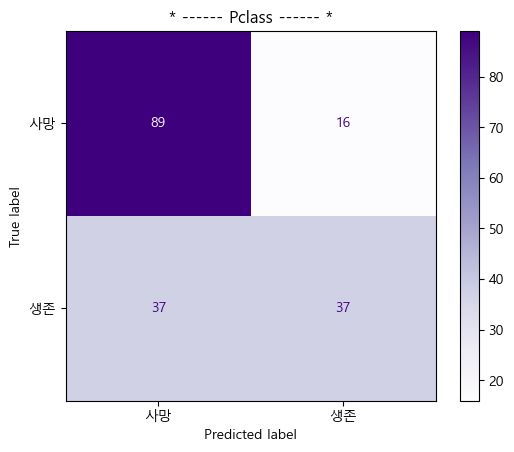

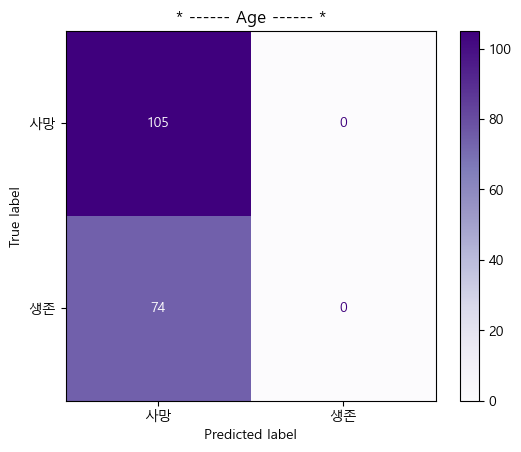

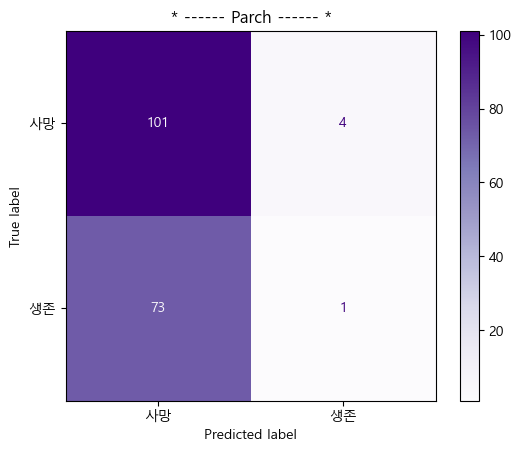

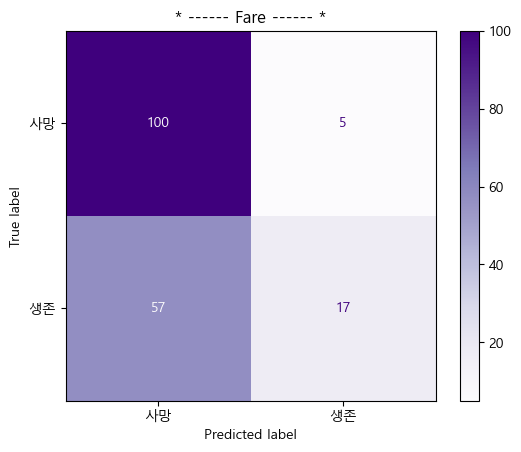

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# ------------------------------- * --------------------------------------------------
columns=['Pclass','Age','Parch','Fare']

for col in columns:
  x_col=x[[col]]

  x_col_train,x_col_test,y_col_train,y_col_test=train_test_split(x_col,y,test_size=0.2,random_state=42)

  model=LogisticRegression(max_iter=500)
  model.fit(x_col_train,y_col_train)

  y_col_pred=model.predict(x_col_test)
  cm__=confusion_matrix(y_col_test,y_col_pred)

  display__=ConfusionMatrixDisplay(cm__,display_labels=['사망','생존'])
  ax__ = display__.plot(cmap='Purples').ax_
  ax__.set_title(f'* ------ {col} ------ *')
  

# ------------------------------- * --------------------------------------------------

9. ### 학습 및 예측한 결과에 대해 오차 행렬(Confusion Matrix)로 결과 확인.

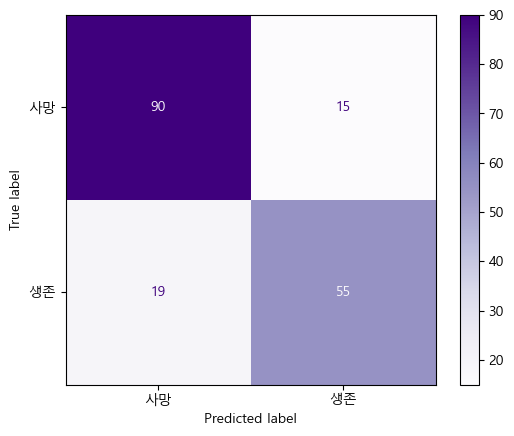

In [9]:


model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)



plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
cm=confusion_matrix(y_test,y_pred)

plot_cm=ConfusionMatrixDisplay(cm,display_labels=['사망','생존'])

plot_cm.plot(cmap='Purples')


10. ### 분류 보고서 확인

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

